Research Analysis performed by Kevin Kwok-Ho Liu, University of California Berkeley

A joint collaboration between the Division of Data Science, Computing, & Society and Cal Alumni Association


In [234]:
import numpy as np
import pandas as pd 
from random import choices
import matplotlib.pyplot as plt
import seaborn as sns

import bz2 # Used to read compressed data
import os # Used to interact with the file system

We begin by loading the appropriate data tables.

In [235]:
interest_info = pd.read_csv("./data_file/Interest_Info.csv")
caa_membership = pd.read_csv("./data_file/CAA_Membership_Info.csv")
Student_Activity = pd.read_csv("./data_file/Student_Activity_Info.csv")
affilation_info = pd.read_csv("./data_file/Affiliation_Info.csv")

In [236]:
affilation_info.head()

,entity_id,affil_code,affil_code_desc,affil_level_code,affil_level_code_desc,affil_status_code,affil_status_desc,start_date,stop_date
0,2,LHSM,Lawrence Hall of Science Member,M,Member,F,Former,2013-08-20 00:00:00,2014-08-31 00:00:00
1,2,V6,Guardsmen - San Francisco,M,Member,C,Current,1995-07-01 00:00:00,NaN
2,2,V2,Junior League of Oakland/East Bay,AM,Associate Member,C,Current,1994-06-15 00:00:00,NaN
3,2,S38,Claremont Country Club,M,Member,C,Current,1994-04-06 00:00:00,NaN
4,2,ATFAT,Friends of Athletics,FR,Friend,C,Current,2017-09-18 00:00:00,NaN


Let's start by inporting some data, we will focus on the interest_info, CAA_Membership_Info, and Student_Activity_Info files to see what we can find out about a student's interests and their participation of
the CAA network.

Here we have the Student Activity table that has the following column values:
entity_id,student_activity_code, student_activity_desc,student_particip_desc 	activity_office_cod)

In [237]:
Student_Activity.head() 


,entity_id,student_activity_code,student_activity_desc,student_particip_code,student_particip_desc,activity_office_code,activity_office_desc,start_dt,stop_dt
0,3,GAOI,Alpha Omicron Pi,P,Participated,,NaN,NaN,NaN
1,4,GSCF,Sigma Chi Fraternity,P,Participated,,NaN,NaN,NaN
2,4,USPS,Assoc Students Of Pretrial Svcs,P,Participated,,NaN,NaN,NaN
3,4,RHI6,1963-72 I-House Resident,P,Participated,,NaN,NaN,NaN
4,4,RHIH,International House Resident,P,Participated,,NaN,NaN,NaN


We also have the caa_membership table with the following column values:entity_id 	caa_current_memb 	caa_latest_memb_type_code 	caa_latest_memb_type_desc 	caa_latest_memb_status_code 	caa_latest_memb_status_desc 	caa_latest_memb_year 	caa_latest_memb_start_date 	caa_latest_memb_stop_date

In [238]:
caa_membership.head() 

,entity_id,caa_current_memb,caa_latest_memb_type_code,caa_latest_memb_type_desc,caa_latest_memb_status_code,caa_latest_memb_status_desc,caa_latest_memb_year,caa_latest_memb_start_date,caa_latest_memb_stop_date
0,3,Y,LB,CAA Golden Bear Life Upgrade,P,Paid,2012,2012-01-06 00:00:00,NaN
1,4,Y,RL,CAA Regular Life Member,P,Paid,1973,1972-03-13 00:00:00,NaN
2,7,Y,RL,CAA Regular Life Member,P,Paid,1931,1930-01-01 00:00:00,NaN
3,10,Y,RL,CAA Regular Life Member,P,Paid,1975,1974-01-17 00:00:00,NaN
4,11,Y,RL,CAA Regular Life Member,P,Paid,1972,1971-05-16 00:00:00,NaN


And we have the interest_info table with the follow column values:
    entity_id
    interest_code
    interest_desc
    start_dt 
    stop_dt

In [239]:
interest_info.head() 

,entity_id,interest_code,interest_desc,start_dt,stop_dt
0,2,GOL,Golf,NaN,NaN
1,2,FOO,Football,NaN,2015-02-05 00:00:00
2,15,DEM,Democratic Politics,2019-01-01 00:00:00,NaN
3,15,CIV,Civic Affairs,2019-01-01 00:00:00,NaN
4,18,GOL,Golf,2015-03-24 00:00:00,NaN


We perform an outer merge with caa_membership and interest_info to get a table of all members and what interests they
had. We also clean the data up a bit by removing any members that have a NaN of "caa_current_memb" status.

In [240]:
## Interest info outer merge with caa_membership
membership_interests = interest_info.merge(caa_membership, how = "outer", left_on = "entity_id", right_on = "entity_id")
membership_interests = membership_interests[membership_interests['caa_current_memb'].notnull()]
membership_interests.head()

,entity_id,interest_code,interest_desc,start_dt,stop_dt,caa_current_memb,caa_latest_memb_type_code,caa_latest_memb_type_desc,caa_latest_memb_status_code,caa_latest_memb_status_desc,caa_latest_memb_year,caa_latest_memb_start_date,caa_latest_memb_stop_date
2,15,DEM,Democratic Politics,2019-01-01 00:00:00,NaN,N,PL,CAA Paying Life,W,Lapsed,2010.0,2010-02-10 00:00:00,NaN
3,15,CIV,Civic Affairs,2019-01-01 00:00:00,NaN,N,PL,CAA Paying Life,W,Lapsed,2010.0,2010-02-10 00:00:00,NaN
8,29,REP,Republican Politics,2019-01-01 00:00:00,NaN,Y,RL,CAA Regular Life Member,P,Paid,1961.0,1960-06-02 00:00:00,NaN
9,29,CIV,Civic Affairs,2019-01-01 00:00:00,NaN,Y,RL,CAA Regular Life Member,P,Paid,1961.0,1960-06-02 00:00:00,NaN
10,31,DEM,Democratic Politics,2019-01-01 00:00:00,NaN,Y,RL,CAA Regular Life Member,P,Paid,1996.0,1995-10-13 00:00:00,NaN


In [241]:
membership_interests_filtered = membership_interests[['entity_id','interest_code','interest_desc','caa_current_memb','caa_latest_memb_type_desc']]
membership_interests_filtered.head()

,entity_id,interest_code,interest_desc,caa_current_memb,caa_latest_memb_type_desc
2,15,DEM,Democratic Politics,N,CAA Paying Life
3,15,CIV,Civic Affairs,N,CAA Paying Life
8,29,REP,Republican Politics,Y,CAA Regular Life Member
9,29,CIV,Civic Affairs,Y,CAA Regular Life Member
10,31,DEM,Democratic Politics,Y,CAA Regular Life Member


We now filter out only the current members.

In [242]:
membership_interests_filtered_member_only = membership_interests_filtered[membership_interests_filtered['caa_current_memb'] == "Y"] 
membership_interests_filtered_member_only.head()

,entity_id,interest_code,interest_desc,caa_current_memb,caa_latest_memb_type_desc
8,29,REP,Republican Politics,Y,CAA Regular Life Member
9,29,CIV,Civic Affairs,Y,CAA Regular Life Member
10,31,DEM,Democratic Politics,Y,CAA Regular Life Member
11,31,CIV,Civic Affairs,Y,CAA Regular Life Member
12,31,FLY,Flying/Airplane Ownership,Y,CAA Regular Life Member


We now see which interests had the most members associated with it.

In [429]:
interest_sorted = membership_interests_filtered.groupby('interest_desc').count()[['entity_id']].rename(columns = {"entity_id":"count"}).sort_values('count',ascending = False)
interest_sorted = interest_sorted.reset_index()
interest_sorted.head()

,interest_desc,count
0,Civic Affairs,19139
1,Democratic Politics,16149
2,Republican Politics,3906
3,Aquatic Sports,1555
4,Health,1448


We now plot how many CAA members have a certain interest. We plot the top 30 interests of CAA members.

<function matplotlib.pyplot.show(*args, **kw)>

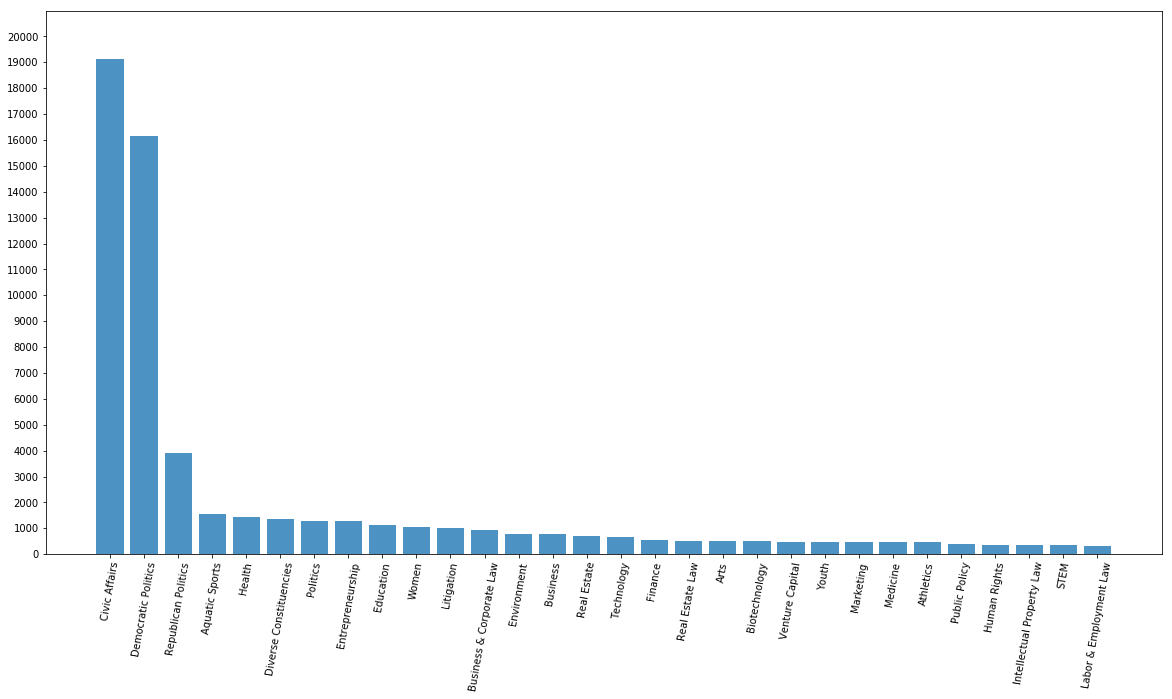

In [244]:
interest_sorted_top_20 = interest_sorted[0:30]

objects = interest_sorted_top_20['interest_desc'].array
y_pos = np.arange(len(objects))
count = interest_sorted_top_20['count'].array

plt.figure(figsize=(20,10))
plt.bar(y_pos,count,align = 'center', alpha = 0.8)
plt.xticks(y_pos, objects,rotation = 80)
plt.ylim([0,21000])
plt.yticks(np.arange(0, 21000, 1000))
plt.show

We do the same analysis on student organizations. 

In [245]:
student_activity_and_membership = Student_Activity.merge(caa_membership, how = "outer", left_on = "entity_id", right_on = "entity_id")
student_activity_and_membership_sorted = student_activity_and_membership.groupby("student_activity_desc").count().rename(columns = {"entity_id":"count"}).sort_values('count',ascending = False)
student_activity_and_membership_sorted[['count']].head()

,count
student_activity_desc,
SLCP-Student Participants,14744
International House Resident,12207
Cal Corps Friends and Alumni,11317
Undergrad Research Apprentice Pgm (URAP),10509
Honor Students' Society,4730


We now perform a hypothesis test to see if members are more likely to have certain interests. To do this, we will use a bootstrap methdology. We will look at each interest and see if it is associated with membership participation. 

Our null hypothesis is:
In the population, the percentage of alumni being active members interested in democratic policies is the same as alumns who don't have particular democratic policies. The difference in the sample is due to random chance.

Likewise our alternative hypothesis is:
In the population, alums who have an interest in democratic policies are more likely to participate on average, than alums who don't have these interests. 

And our test statistic would be:
The alternative hypothesis compares the percentage of alumni participating as members of the two groups (interest/no interest) and says that the average for the alumni who have this interest is greater. Therefore it is reasonable for us to use the difference between the two group means as our statistic.
 
 

There are 352 different interests. We store each of the in an array_of_interests

In [246]:
len(interest_sorted["interest_desc"].unique())
array_of_interests = interest_sorted["interest_desc"].array
array_of_interests

<PandasArray>
[                     'Civic Affairs',                'Democratic Politics',
                'Republican Politics',                     'Aquatic Sports',
                             'Health',             'Diverse Constituencies',
                           'Politics',                   'Entrepreneurship',
                          'Education',                              'Women',
 ...
 'Distance Learning/Online Education',                        'Early Music',
                             'Ethics',                         'Freshwater',
     'Spanish & Portuguese Interests',              'Palestinian Interests',
          'Internet-Related e-Health',                               'K-12',
                    'Lutheran Church',                      'Public Health']
Length: 351, dtype: object

As a proof of concept, let's just focus on democratic policies first. 

In [247]:
democratic_policies = membership_interests[membership_interests["interest_desc"] == "Democratic Politics"]
democratic_participate = democratic_policies[democratic_policies["caa_current_memb"] == "Y"]
democratic_no_participate = democratic_policies[democratic_policies["caa_current_memb"] == "N"]
democratic_policies.head()

,entity_id,interest_code,interest_desc,start_dt,stop_dt,caa_current_memb,caa_latest_memb_type_code,caa_latest_memb_type_desc,caa_latest_memb_status_code,caa_latest_memb_status_desc,caa_latest_memb_year,caa_latest_memb_start_date,caa_latest_memb_stop_date
2,15,DEM,Democratic Politics,2019-01-01 00:00:00,NaN,N,PL,CAA Paying Life,W,Lapsed,2010.0,2010-02-10 00:00:00,NaN
10,31,DEM,Democratic Politics,2019-01-01 00:00:00,NaN,Y,RL,CAA Regular Life Member,P,Paid,1996.0,1995-10-13 00:00:00,NaN
20,80,DEM,Democratic Politics,2019-01-01 00:00:00,NaN,Y,RL,CAA Regular Life Member,P,Paid,1931.0,1930-01-01 00:00:00,NaN
24,82,DEM,Democratic Politics,2015-03-10 00:00:00,NaN,Y,RL,CAA Regular Life Member,P,Paid,1972.0,1971-10-10 00:00:00,NaN
40,147,DEM,Democratic Politics,2019-01-01 00:00:00,NaN,Y,RL,CAA Regular Life Member,P,Paid,1951.0,1950-07-31 00:00:00,NaN


As we can see, of the members who expressed an interest in democratic politics, there appears to be about ~1000 more members participating in CAA as members. However, this alone does not prove or show that CAA members are more left-leaning in general. In further analysis, we will attempt to awnser this question. 

In [248]:
print(len(democratic_participate) /len(democratic_policies))

0.5303733977336058


53% of alumns with democratic interests were CAA members, compared with 50% from the general population.

In [249]:
len(membership_interests_filtered_member_only)/len(membership_interests)

0.5037793034056677

Our test statistic is calculated as below. Greater values will suggest an anomoly.
Basically we are finding the difference in participation between members who have expressed an interest
in democratic policies versus the general population.

In [250]:
point_test_statistic = len(democratic_participate) /len(democratic_policies) - len(membership_interests_filtered_member_only)/len(membership_interests)
point_test_statistic

0.026594094327938134

That said, we will now perform A/B testing to see if people who are interested in democratic politics become CAA members due to random chance or if there is a correlation between the CAA membership and favorability of democratic politics. We shuffle the original memberships interest table (shuffle column caa_current_memb) and calculate the test statistic. 


In [18]:
array_of_test_statistics = []
sampling_array = membership_interests["caa_current_memb"].array

for i in range(0,1000):
    ##Sampling methodology: 
    #new_suffled_list = choices(sampling_array, k=len(membership_interests_filtered))
    new_suffled_list = np.array(membership_interests.sample(n=len(membership_interests),replace = True)["caa_current_memb"])
    membership_interests_filtered['caa_current_memb_shuffled'] = new_suffled_list
    shuffled_table = membership_interests_filtered
    
    democratic_policies_shuffled = shuffled_table[shuffled_table["interest_desc"] == "Democratic Politics"]
    democratic_participate_shuffled = democratic_policies_shuffled[democratic_policies_shuffled["caa_current_memb_shuffled"] == "Y"]
    democratic_no_participate_shuffled = democratic_policies_shuffled[democratic_policies_shuffled["caa_current_memb_shuffled"] == "N"]
    
    test_statistic =  (len(democratic_participate_shuffled) /len(democratic_policies_shuffled)) - 0.5037793034056677
    array_of_test_statistics.append(test_statistic)



/Users/kevinliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
print(len(democratic_participate_shuffled), len(democratic_no_participate_shuffled), len(democratic_policies_shuffled))

8151 7998 16149


We have a p-value of 0, indicating that the null hypothesis could not have happened. Hence, we can conclude that alumns who expressed an interest in democratic politics are more likely to become CAA current members.

In [20]:
count = 0
for i in range(len(array_of_test_statistics)):
    if (point_test_statistic >= array_of_test_statistics[i]):
        count = count + 1

1 - count/1000

0.0

Let's expand out hypothesis test to all interests, and see which ones are significant. To reduce the risk of messing up our previous values, we reassign our data tables. We want to make sure our sample size is appropriate. 100 is the minimum acceptable sample size, so we only look at interests that have more than 100 people. We end up with 168 valid interests. We can now store the percetentage of CAA members per acceptable interest.

In [ ]:
table_1 = membership_interests_filtered_member_only
table_2 = membership_interests_filtered
table_3 = membership_interests
table_4 = interest_sorted[interest_sorted['count'] > 100]


In [267]:
def A_B_test(interest,table_2, n=100):
    
    array_of_test_statistics = []
    sampling_array = membership_interests["caa_current_memb"].array
    
    for i in np.arange(1,n):
       
    ##Sampling methodology: 
        new_suffled_list = np.array(table_2.sample(n=len(table_2),replace = True)["caa_current_memb"])
        table_2['caa_current_memb_shuffled'] = new_suffled_list
        shuffled_table = table_2

        interest_shuffled = shuffled_table[shuffled_table["interest_desc"] == interest]
        participate_shuffled = interest_shuffled[interest_shuffled["caa_current_memb_shuffled"] == "Y"]
        no_participate_shuffled = interest_shuffled[interest_shuffled["caa_current_memb_shuffled"] == "N"]

        test_statistic =  (len(participate_shuffled) /len(interest_shuffled)) - 0.5037793034056677
        array_of_test_statistics.append(test_statistic)
    return array_of_test_statistics
        

In [281]:
def point_test_statistic(interest):
    ## Run this before running the A_B_test
    shuffled_table = membership_interests_filtered
    interest_shuffled = shuffled_table[shuffled_table["interest_desc"] == interest]
    participate_shuffled = interest_shuffled[interest_shuffled["caa_current_memb"] == "Y"]
    no_participate_shuffled = interest_shuffled[interest_shuffled["caa_current_memb"] == "N"]
    point_test_statistic = (len(participate_shuffled) /len(interest_shuffled)) - (len(membership_interests_filtered_member_only)/len(membership_interests))
    return point_test_statistic

In [437]:
def p_value_likely(array_of_test_statistics,point_test_statistic_result,n=100):
    count = 0
    for i in range(len(array_of_test_statistics)):
        if (point_test_statistic_result >= array_of_test_statistics[i]):
            count = count + 1

    return 1 - count/n


In [438]:
def p_value_unlikely(array_of_test_statistics,point_test_statistic_result,n=100):
    count = 0
    for i in range(len(array_of_test_statistics)):
        if (point_test_statistic_result >= array_of_test_statistics[i]):
            count = count + 1

    return count/n
 

In [426]:
array_of_test_statistics = A_B_test("International Law",table_2)
point_test_statistic_result = point_test_statistic("International Law")
p_value_unlikely(array_of_test_statistics,point_test_statistic_result)


/Users/kevinliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


0.04

We know run our hypothesis test on all acceptable interests (those with >= 100 people). Our p-values will
all be stored in dict_of_p_values (key = interest, value = p-value).

In [439]:
dict_of_p_values = {}
for interest in table_4["interest_desc"].array:
    array_of_test_statistics = A_B_test(interest,table_2)
    point_test_statistic_result = point_test_statistic(interest)
    dict_of_p_values[interest] = p_value_likely(array_of_test_statistics,point_test_statistic_result)

/Users/kevinliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


We will also store the relative percent of caa members for each acceptable interest. 

In [441]:
percent_dictionary ={}
#array_of_percents = []
for interest in table_4["interest_desc"].array:
    total = membership_interests_filtered[membership_interests_filtered["interest_desc"] == interest]
    member = total[total["caa_current_memb"] == "Y"]
    non_member = total[total["caa_current_memb"] == "N"]
    percent = len(member)/len(total)
    percent_dictionary[interest] = percent * 100
    #array_of_percents.append(percent*100)
    

In [448]:
len(interest_sorted)

351

Now let's make a new dataframe containing an interest column and percent members. 

We define interest column as the specific interest.

We define percent members as the # of CAA members for given interest / total # of people with that interest.

In [442]:
col1 = list(percent_dictionary.keys())
col2 = list(percent_dictionary.values())
table_of_percent_members = pd.DataFrame(data={"interests_column":col1,'percent members (interest population)':col2})


In [462]:

# statistically_significant_dictionary = {}
# for i in dict_of_p_values:
#     if (dict_of_p_values[i] < 0.05):
#         statistically_significant_dictionary[i] = dict_of_p_values[i]
# interests_column = statistically_significant_dictionary.keys()
# p_value_column = statistically_significant_dictionary.values()
interests_column = list(dict_of_p_values.keys())
p_value_column = list(dict_of_p_values.values())


df = pd.DataFrame(data={'interests_column':interests_column,'p_value':p_value_column})
df = df.merge(interest_sorted,left_on="interests_column",right_on="interest_desc")
df["percent members (total population)"] = df['count']/len(table_2) * 100
df = df.merge(table_of_percent_members)
df = df.sort_values(by='p_value')


Now, let's filter out to those that only have a p-value of 0.05 or less.

In [466]:
df = df[df['p_value'] < 0.05]
df.head()

,interests_column,p_value,interest_desc,count,percent members (total population),percent members (interest population)
0,Civic Affairs,0.01,Civic Affairs,19139,5.871111,54.281833
30,Music,0.01,Music,321,0.098470,74.143302
31,Architecture,0.01,Architecture,313,0.096016,63.897764
39,Jewish Interests,0.01,Jewish Interests,257,0.078838,64.980545
82,Global Health,0.01,Global Health,103,0.031596,61.165049


Let's look at it in a different direction. Are there interests associated with alumni that would make them less prone to donate to CAA? In this case, out testing methdology is largely the same, but we revise the hyppothesis testing to be as follows:

Null Hypothesis: Alumns having these [interests] are no less likely to donate to CAA than other alums.

Alternative Hypothesis: Alums having these [interests] are less likely to donate to CAA than other alums.

Test Statistic: We calculate the percentage of CAA members within that area of interest and compare it to the overall population. The alternative hypothesis says that those with certain interests are less likely to donate to CAA, so it is resonable to use the difference as the test statistic.

Critera for rejecting the null: We will use the standard p-val of 0.05 defined as "statistically significant."


In [449]:
dict_of_p_values_unlikely = {}
for interest in table_4["interest_desc"].array:
    array_of_test_statistics = A_B_test(interest,table_2)
    point_test_statistic_result = point_test_statistic(interest)
    dict_of_p_values_unlikely[interest] = p_value_unlikely(array_of_test_statistics,point_test_statistic_result)

/Users/kevinliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


We will also store the relative percent of caa members for each acceptable interest. 

In [450]:
percent_dictionary_unlikely ={}
#array_of_percents = []
for interest in table_4["interest_desc"].array:
    total = membership_interests_filtered[membership_interests_filtered["interest_desc"] == interest]
    member = total[total["caa_current_memb"] == "Y"]
    non_member = total[total["caa_current_memb"] == "N"]
    percent = len(member)/len(total)
    percent_dictionary_unlikely[interest] = percent * 100
    #array_of_percents.append(percent*100)
    

In [451]:
col3 = list(percent_dictionary_unlikely.keys())
col4 = list(percent_dictionary_unlikely.values())
table_of_percent_members_unlikely = pd.DataFrame(data={"interests_column":col3,'percent members (interest population)':col4})


In [469]:
interests_column_unlikely = list(dict_of_p_values_unlikely.keys())
p_value_column_unlikely = list(dict_of_p_values_unlikely.values())


df_unlikely = pd.DataFrame(data={'interests_column':interests_column_unlikely,'p_value':p_value_column_unlikely})
df_unlikely = df_unlikely.merge(interest_sorted,left_on="interests_column",right_on="interest_desc")
df_unlikely["percent members (total population)"] = df_unlikely['count']/len(table_2) * 100
df_unlikely = df_unlikely.merge(table_of_percent_members_unlikely)
df_unlikely = df_unlikely.sort_values(by='p_value')
df_unlikely.head()

,interests_column,p_value,interest_desc,count,percent members (total population),percent members (interest population)
22,Marketing,0.00,Marketing,478,0.146632,41.631799
40,Non-Profit Business,0.01,Non-Profit Business,256,0.078531,43.750000
10,Litigation,0.03,Litigation,1021,0.313204,47.306562
47,International Law,0.06,International Law,213,0.065340,44.131455
29,Labor & Employment Law,0.09,Labor & Employment Law,334,0.102458,47.005988


We also again filter out to p valus of 0.05 or less.

In [471]:
df_unlikely = df_unlikely[df_unlikely['p_value'] < 0.05]
df_unlikely

,interests_column,p_value,interest_desc,count,percent members (total population),percent members (interest population)
22,Marketing,0.00,Marketing,478,0.146632,41.631799
40,Non-Profit Business,0.01,Non-Profit Business,256,0.078531,43.750000
10,Litigation,0.03,Litigation,1021,0.313204,47.306562
